# 🧠 Neural Network Modeling with SMOTE on Student Mental Health Data
This notebook performs data preprocessing, augmentation with SMOTE, and training of a neural network classifier using Keras.

In [1]:
# !pip install imbalanced-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [2]:
# Load dataset
df = pd.read_csv("clear dataset feature selection.csv")

# Define features and target
features = ['Vegetables', 'tea Intake (estekan/day)', 'sweets', 'fruits',
            'dairy', 'oils', 'active_transport', 'physical_activity',
            'leisure_time(hour / week)', 'illnesses']
target = 'n_93_cluster'

X = df[features].values
y = df[target].values

In [3]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [5]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42)

In [6]:
X_resampled.shape

(450, 10)

In [7]:
# Build and compile the neural network model
model = Sequential([
    Dense(8, input_dim=X.shape[1], activation='relu'),
    Dense(6, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=0.01),
    metrics=['accuracy']
)

In [12]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.1,
    verbose=1
)

Epoch 1/50
21/21 [==============================] - 0s 4ms/step - loss: 0.0666 - accuracy: 0.9784 - val_loss: 0.5398 - val_accuracy: 0.9167
Epoch 2/50
21/21 [==============================] - 0s 2ms/step - loss: 0.0932 - accuracy: 0.9753 - val_loss: 0.6169 - val_accuracy: 0.8611
Epoch 3/50
21/21 [==============================] - 0s 2ms/step - loss: 0.0777 - accuracy: 0.9753 - val_loss: 0.5821 - val_accuracy: 0.8611
Epoch 4/50
21/21 [==============================] - 0s 2ms/step - loss: 0.0834 - accuracy: 0.9784 - val_loss: 0.8015 - val_accuracy: 0.8056
Epoch 5/50
21/21 [==============================] - 0s 2ms/step - loss: 0.0760 - accuracy: 0.9691 - val_loss: 0.6100 - val_accuracy: 0.8611
Epoch 6/50
21/21 [==============================] - 0s 2ms/step - loss: 0.0570 - accuracy: 0.9877 - val_loss: 0.5966 - val_accuracy: 0.8889
Epoch 7/50
21/21 [==============================] - 0s 2ms/step - loss: 0.0615 - accuracy: 0.9784 - val_loss: 0.6796 - val_accuracy: 0.8333
Epoch 8/50
21/21 [==

In [13]:
# Evaluate the model
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

print("\n🔍 Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Critical', 'Vulnerable', 'Stable']))

3/3 [==============================] - 0s 660us/step

🔍 Classification Report:
              precision    recall  f1-score   support

    Critical       0.92      1.00      0.96        23
  Vulnerable       0.76      0.76      0.76        33
      Stable       0.75      0.71      0.73        34

    accuracy                           0.80        90
   macro avg       0.81      0.82      0.81        90
weighted avg       0.80      0.80      0.80        90



3/3 [==============================] - 0s 997us/step


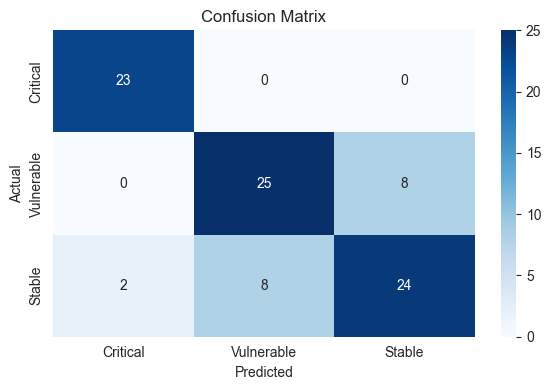

              precision    recall  f1-score   support

    Critical       0.92      1.00      0.96        23
  Vulnerable       0.76      0.76      0.76        33
      Stable       0.75      0.71      0.73        34

    accuracy                           0.80        90
   macro avg       0.81      0.82      0.81        90
weighted avg       0.80      0.80      0.80        90



In [14]:

# 8. Evaluation and Visualization
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Critical', 'Vulnerable', 'Stable']

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# Classification Report
print(classification_report(y_test, y_pred, target_names=labels))


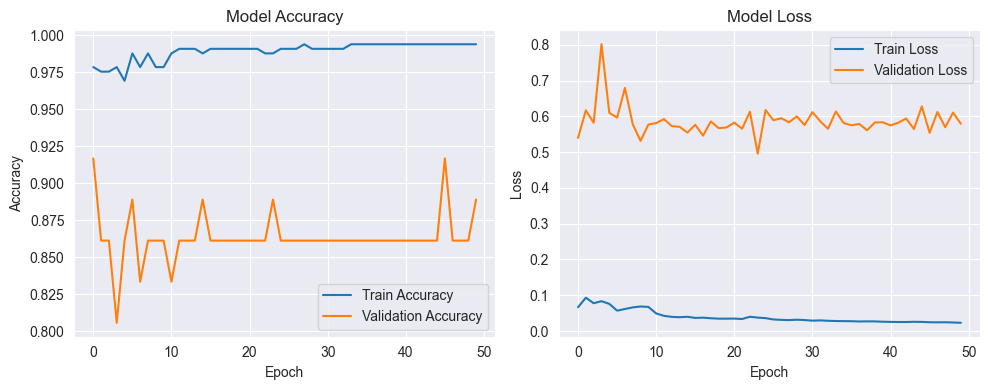

In [15]:
# Accuracy and Loss Plot
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.tight_layout()
plt.show()
